In [1]:
import pandas as pd
import os
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/통신사 고객 이탈 데이터.csv', encoding = 'euc-kr')
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,No Complaints,38,Minimum Amount,4370,71,5,17,Age Group 3,Prepaid Plan,Active,30,197.640,0
1,0,No Complaints,39,Minimum Amount,318,5,7,4,Age Group 2,Prepaid Plan,Inactive,25,46.035,0
2,10,No Complaints,37,Minimum Amount,2453,60,359,24,Age Group 3,Prepaid Plan,Active,30,1536.520,0
3,10,No Complaints,38,Minimum Amount,4198,66,1,35,Young Age Group,Prepaid Plan,Active,15,240.020,0
4,3,No Complaints,38,Minimum Amount,2393,58,2,33,Young Age Group,Prepaid Plan,Active,15,145.805,0


In [3]:
age_group_customer_value = data.groupby('Age Group')['Customer Value'].mean()

In [4]:
print(age_group_customer_value)

Age Group
Age Group 2        547.126707
Age Group 3        541.435116
Age Group 4        207.699177
Old Age Group      126.214853
Young Age Group    334.565447
Name: Customer Value, dtype: float64


<Axes: xlabel='Age Group'>

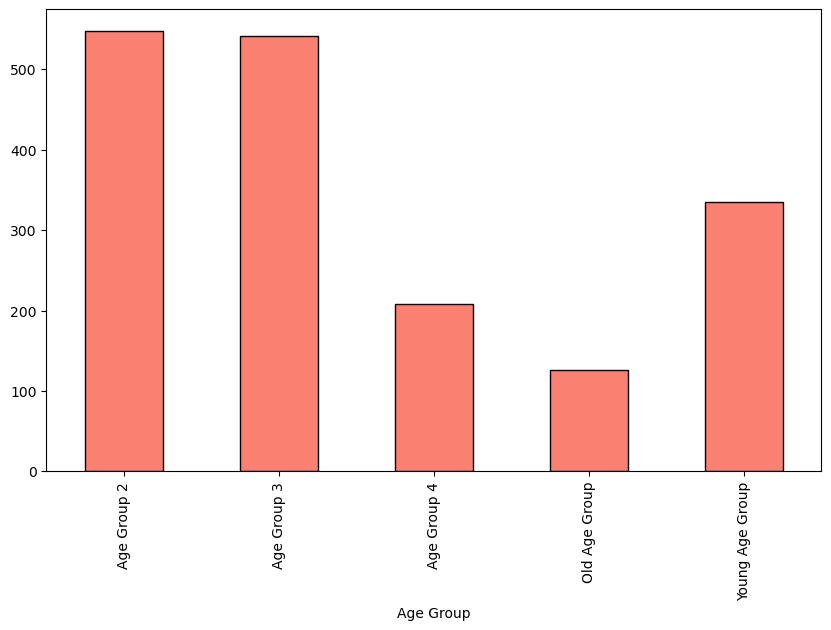

In [5]:
plt.figure(figsize=(10, 6))
age_group_customer_value.plot(kind='bar', color='salmon', edgecolor='black')

In [54]:
charge_amount_counts = data.groupby(['Age Group', 'Churn'])['Charge  Amount'].sum()

In [67]:
acc = data.groupby(['Age Group','Charge  Amount'])['Churn'].sum()

In [66]:
filtered_data = data.query("`Age Group` not in ['Young Age Group', 'Old Age Group']")

In [61]:
churn_call_failure = data.groupby(['Age Group', 'Churn'])['Call  Failure'].sum()

In [31]:
complain_counts = data.groupby(['Age Group', 'Churn'])['Call  Failure'].sum()

In [20]:
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

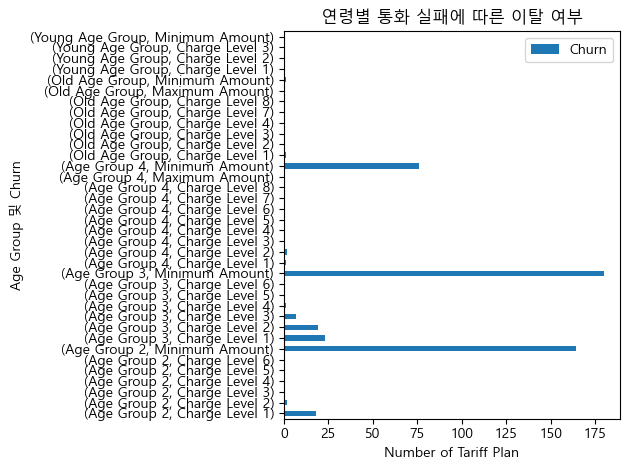

In [68]:
acc.plot(kind='barh')
plt.title('연령별 통화 실패에 따른 이탈 여부')
plt.xlabel('Number of Tariff Plan')
plt.ylabel('Age Group 및 Churn')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()